In [2]:
import numpy as np

from tqdm.auto import tqdm

import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

import matilda
import matilda.prototyping
import matilda.harmonic


## Trifold

three triangles sharing an edge

In [58]:
simplices = [
    [0],
    [1],
    [2],
    [3],
    [4],
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [1, 2],
    [1, 3],
    [1, 4],
]

coord_vertices = [[0, 0], [1, 0], [1 / 2, 1], [0, -1], [1, -1]]


simplices = [np.array(s) for s in simplices]

K = matilda.prototyping.FilteredSimplicialComplex(
    dimension=2,
    simplices=simplices,
    simplices_indices=[i for i in range(len(simplices))],
    appears_at=[i for i in range(len(simplices))],
)


<Axes: >

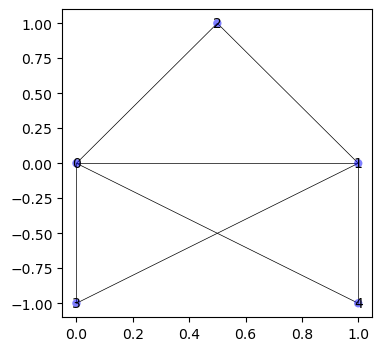

In [59]:
plotter = matilda.plot.Plotter()

fig, ax = plt.subplots(ncols=1, figsize=(4, 4))

plotter.plot_2skel(
    K,
    max_id=99,
    pos={i: p for i, p in enumerate(coord_vertices)},
    labels=[str(i[0]) for i in simplices if len(i) == 1],
    this_ax=ax,
)


In [60]:
homology_computer = matilda.PersistentHomologyComputer()
homology_computer.compute_persistent_homology(K, with_representatives=True, modulus=0)

for k, v in homology_computer.bars.items():
    if k > 1:
        break
    print("Bars of dimension {}".format(k))
    for kk, vv in v.items():
        print("{}:{}".format(kk, vv))


Bars of dimension 0
0:[0.0, inf]
1:[1.0, 5.0]
2:[2.0, 6.0]
3:[3.0, 7.0]
4:[4.0, 8.0]
Bars of dimension 1
9:[9.0, inf]
10:[10.0, inf]
11:[11.0, inf]


In [61]:
homology_computer.persistent_cycles[1]


{9: {5: 1, 6: -1, 9: 1}, 10: {5: 1, 7: -1, 10: 1}, 11: {5: 1, 8: -1, 11: 1}}

In [62]:
harmonic_computer = matilda.harmonic.HarmonicRepresentativesComputer(
    K, homology_computer
)
harmonic_computer.compute_harmonic_cycles(dim=1)


In [63]:
harmonic_computer.harmonic_cycles[1]


{9: {5: 1.0, 6: -1.0, 7: 0.0, 8: 0.0, 9: 1.0},
 10: {5: 0.6666666666666665,
  6: 0.3333333333333334,
  7: -1.0,
  8: 0.0,
  9: -0.3333333333333334,
  10: 1.0},
 11: {5: 0.49999999999999994,
  6: 0.2500000000000001,
  7: 0.24999999999999992,
  8: -1.0,
  9: -0.2500000000000001,
  10: -0.24999999999999992,
  11: 1.0}}

In [64]:
for id in harmonic_computer.harmonic_cycles[1].keys():
    print(
        "ID: {} standard {:.2f}, harmonic {:.2f}".format(
            id,
            np.linalg.norm(
                [i for _, i in homology_computer.persistent_cycles[1][id].items()]
            ),
            np.linalg.norm(
                [i for _, i in harmonic_computer.harmonic_cycles[1][id].items()]
            ),
        )
    )


ID: 9 standard 1.73, harmonic 1.73
ID: 10 standard 1.73, harmonic 1.63
ID: 11 standard 1.73, harmonic 1.58


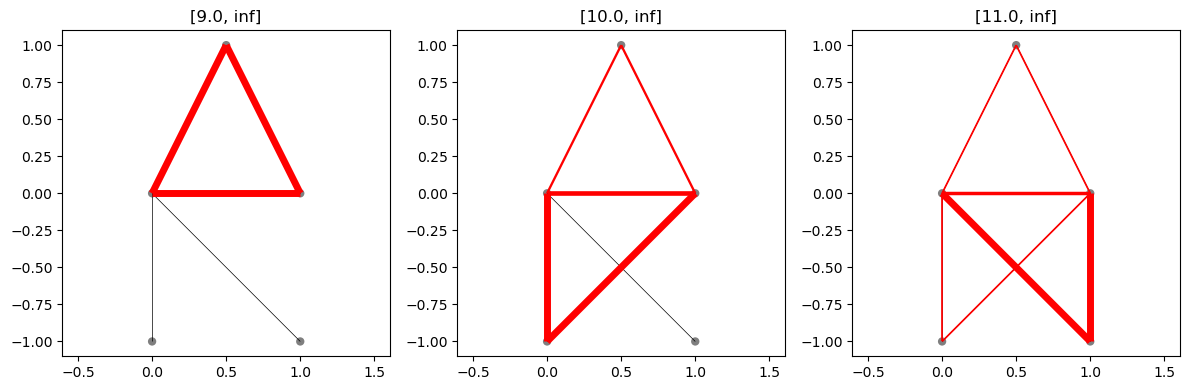

In [65]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

for i, id in enumerate(harmonic_computer.harmonic_cycles[1].keys()):
    plotter.plot_2skel(
        K,
        max_id=id,
        pos={i: p for i, p in enumerate(coord_vertices)},
        vertices_color=["black"],
        t_alpha=0.2,
        this_ax=axs[i],
    )

    lines_0, w_0 = plotter.plot_1cycle(
        harmonic_computer.harmonic_cycles[1][id], K, coord_vertices
    )

    lg0 = matplotlib.collections.LineCollection(
        lines_0, color="red", linewidths=w_0 * 5
    )
    axs[i].add_collection(lg0)

    axs[i].axis("equal")
    axs[i].set_title(homology_computer.bars[1][id])

plt.tight_layout()
plt.show()


## Mobius band

![mobius](img/mobius.jpg)

In [66]:
simplices = [
    [0],
    [1],
    [2],
    [3],
    [4],
    [5],
    [0, 1],
    [0, 3],
    [0, 4],
    [1, 2],
    [1, 4],
    [1, 5],
    [2, 3],
    [2, 0],
    [2, 5],
    [3, 4],
    [4, 5],
    [5, 0],
    [0, 3, 4],
    [0, 1, 4],
    [1, 4, 5],
    [1, 2, 5],
    [2, 5, 0],
    [2, 3, 0],
]

simplices = [np.array(s) for s in simplices]

K = matilda.prototyping.FilteredSimplicialComplex(
    dimension=2,
    simplices=simplices,
    simplices_indices=[i for i in range(len(simplices))],
    appears_at=[0 for _ in range(len(simplices))],
)


In [67]:
homology_computer = matilda.PersistentHomologyComputer()
homology_computer.compute_persistent_homology(K, with_representatives=True, modulus=0)

for k, v in homology_computer.bars.items():
    if k > 1:
        break
    print("Bars of dimension {}".format(k))
    for kk, vv in v.items():
        print("{}:{}".format(kk, vv))


Bars of dimension 0
0:[0.0, inf]
Bars of dimension 1
12:[0.0, inf]


In [68]:
homology_computer.persistent_cycles[1]


{12: {6: 1, 7: -1, 9: 1, 12: 1}}

In [69]:
harmonic_computer = matilda.harmonic.HarmonicRepresentativesComputer(
    K, homology_computer
)
harmonic_computer.compute_harmonic_cycles(dim=1)


In [70]:
harmonic_computer.harmonic_cycles[1]


{12: {6: 1.0, 7: -1.0, 8: 0.0, 9: 1.0, 10: 0.0, 11: 0.0, 12: 1.0}}

## Klein bottle

![bottle](img/kb.jpg)

In [71]:
simplices = [
    [0],
    [1],
    [2],
    [3],
    [4],
    [5],
    [6],
    [7],
    [8],
    [0, 1],
    [1, 2],
    [0, 3],
    [0, 4],
    [0, 6],
    [0, 8],
    [1, 2],
    [1, 4],
    [1, 5],
    [1, 7],
    [1, 8],
    [2, 5],
    [2, 3],
    [2, 6],
    [2, 7],
    [3, 4],
    [3, 5],
    [3, 6],
    [3, 7],
    [4, 5],
    [4, 7],
    [4, 8],
    [5, 6],
    [5, 8],
    [6, 7],
    [6, 8],
    [7, 8],
    [0, 3, 4],
    [0, 1, 4],
    [1, 4, 5],
    [1, 2, 5],
    [2, 3, 5],
    [0, 2, 3],
    [3, 6, 7],
    [3, 4, 7],
    [4, 7, 8],
    [4, 5, 8],
    [5, 6, 8],
    [3, 5, 6],
    [0, 2, 6],
    [2, 6, 7],
    [1, 2, 7],
    [1, 2, 8],
    [0, 1, 8],
    [0, 6, 8],
]

simplices = [np.array(s) for s in simplices]

K = matilda.prototyping.FilteredSimplicialComplex(
    dimension=2,
    simplices=simplices,
    simplices_indices=[i for i in range(len(simplices))],
    appears_at=[0 for _ in range(len(simplices))],
)

for i in range(K.dimension + 1):
    print(
        "{} {}-dim simplices".format(
            len([s for s in K.simplices if len(s) == (i + 1)]), i
        )
    )


9 0-dim simplices
27 1-dim simplices
18 2-dim simplices


In [72]:
homology_computer = matilda.PersistentHomologyComputer()
homology_computer.compute_persistent_homology(K, with_representatives=True, modulus=0)

for k, v in homology_computer.bars.items():
    if k > 1:
        break
    print("Bars of dimension {}".format(k))
    for kk, vv in v.items():
        print("{}:{}".format(kk, vv))


Bars of dimension 0
0:[0.0, inf]
Bars of dimension 1
26:[0.0, inf]


In [73]:
homology_computer.persistent_cycles[1]


{26: {11: 1, 13: -1, 26: 1}}

## Real Projective Plane

![rp2](img/rp2.jpg)

In [14]:
simplices = [
    [1],
    [2],
    [3],
    [4],
    [5],
    [6],
    [1, 2],
    [1, 3],
    [1, 4],
    [1, 5],
    [1, 6],
    [2, 3],
    [2, 4],
    [2, 5],
    [2, 6],
    [3, 4],
    [3, 5],
    [3, 6],
    [4, 5],
    [4, 6],
    [5, 6],
    [1, 2, 5],
    [1, 2, 6],
    [1, 3, 4],
    [1, 3, 6],
    [1, 4, 5],
    [2, 3, 4],
    [2, 3, 5],
    [2, 4, 6],
    [3, 5, 6],
    [4, 5, 6],
]

simplices = [np.array(s) for s in simplices]

K = matilda.prototyping.FilteredSimplicialComplex(
    dimension=2,
    simplices=simplices,
    simplices_indices=[i for i in range(len(simplices))],
    appears_at=[0 for _ in range(len(simplices))],
)

for i in range(K.dimension + 1):
    print(
        "{} {}-dim simplices".format(
            len([s for s in K.simplices if len(s) == (i + 1)]), i
        )
    )


6 0-dim simplices
15 1-dim simplices
10 2-dim simplices


In [17]:
homology_computer = matilda.PersistentHomologyComputer()
homology_computer.compute_persistent_homology(K, with_representatives=True, modulus=0)

for k, v in homology_computer.bars.items():
    if k > 1:
        break
    print("Bars of dimension {}".format(k))
    for kk, vv in v.items():
        print("{}:{}".format(kk, vv))


Bars of dimension 0
0:[0.0, inf]


In [9]:
homology_computer.persistent_cycles[1]


{11: {6: 1, 7: 2, 11: 1}}

In [77]:
harmonic_computer = matilda.harmonic.HarmonicRepresentativesComputer(
    K, homology_computer
)
harmonic_computer.compute_harmonic_cycles(dim=1)

harmonic_computer.harmonic_cycles[1]


{11: {6: 1.0, 7: -1.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 1.0}}

## Real projective plane v. 2

![rp2](img/new_rp2.jpg)

In [10]:
simplices = [
    [1],
    [2],
    [3],
    [4],
    [5],
    [6],
    [7],
    [1, 2],
    [1, 3],
    [1, 4],
    [1, 7],
    [2, 3],
    [2, 4],
    [2, 5],
    [2, 6],
    [2, 7],
    [3, 4],
    [3, 5],
    [3, 6],
    [3, 7],
    [4, 5],
    [4, 6],
    [4, 7],
    [5, 7],
    [6, 7],
    [1, 2, 4],
    [1, 2, 7],
    [1, 3, 4],
    [1, 3, 7],
    [2, 3, 5],
    [2, 3, 6],
    [2, 4, 6],
    [2, 5, 7],
    [3, 4, 5],
    [3, 6, 7],
    [4, 5, 7],
    [4, 6, 7],
]

simplices = [np.array(s) for s in simplices]

K = matilda.prototyping.FilteredSimplicialComplex(
    dimension=2,
    simplices=simplices,
    simplices_indices=[i for i in range(len(simplices))],
    appears_at=[0 for _ in range(len(simplices))],
)

for i in range(K.dimension + 1):
    print(
        "{} {}-dim simplices".format(
            len([s for s in K.simplices if len(s) == (i + 1)]), i
        )
    )


7 0-dim simplices
18 1-dim simplices
12 2-dim simplices


In [13]:
homology_computer = matilda.PersistentHomologyComputer()
homology_computer.compute_persistent_homology(K, with_representatives=True, modulus=0)

for k, v in homology_computer.bars.items():
    if k > 1:
        break
    print("Bars of dimension {}".format(k))
    for kk, vv in v.items():
        print("{}:{}".format(kk, vv))


Bars of dimension 0
0:[0.0, inf]
